In [5]:
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
import h5py
from collections import OrderedDict


In [38]:
yr_range = 10
start = 2015
end = 2045
dt = 36
idxes = np.arange(0, 1460, dt)

In [39]:
base_dataset_pl_vars = OrderedDict(zip(['q', 't', 'u', 'v', 'z'], range(5)))
base_dataset_sl_vars = OrderedDict(zip(['msl', 't2m', 'u10', 'v10'], range(4)))
base_dataset_pressure_levels = OrderedDict(zip([925, 800, 700, 600, 500, 250], range(6)))

In [40]:
fld = "q"
level = 925
# sl_idx = base_dataset_sl_vars['t2m']
# print(sl_idx)           
pl_idx = base_dataset_pl_vars[fld]
lvl = base_dataset_pressure_levels[level]
print(pl_idx, lvl)

0 0


In [41]:
path_future = "/pscratch/sd/p/pharring/cmip_data/EC-Earth3P-HR/highresSST-future/r2i1p1f1"
path_present = "/pscratch/sd/p/pharring/cmip_data/EC-Earth3P-HR/highresSST-present/r2i1p1f1"

In [42]:
lat_n = 20
lat_s = 20
n = 512
n_pixel_per_deg = n/180
low = int(n//2 - n_pixel_per_deg * lat_s)
high = int(n//2 + n_pixel_per_deg * lat_n)
low = 0
high = 511
print(low, high)
index_set = list(range(low,high))

0 511


In [43]:
temp_list = []
var_list = []
for count, y in enumerate(list(range(start, end+1))):
    future_str = "{}.h5".format(y)
    print(future_str)
    with h5py.File(os.path.join(*[path_future, future_str]), "r") as f:
        var = f['pl'][::dt, pl_idx, lvl, low:high]
        temp_list.append(var)
    if (count+1)%yr_range == 0 and count != 0:
        var = np.concatenate(temp_list, axis=0)
        temp_list = []
        print("appending {}".format(var.shape))
        var_list.append(var)
        
for var in var_list:
    print(var.shape)

2015.h5
2016.h5
2017.h5
2018.h5
2019.h5
2020.h5
2021.h5
2022.h5
2023.h5
2024.h5
appending (410, 511, 1024)
2025.h5
2026.h5
2027.h5
2028.h5
2029.h5
2030.h5
2031.h5
2032.h5
2033.h5
2034.h5
appending (410, 511, 1024)
2035.h5
2036.h5
2037.h5
2038.h5
2039.h5
2040.h5
2041.h5
2042.h5
2043.h5
2044.h5
appending (410, 511, 1024)
2045.h5
(410, 511, 1024)
(410, 511, 1024)
(410, 511, 1024)


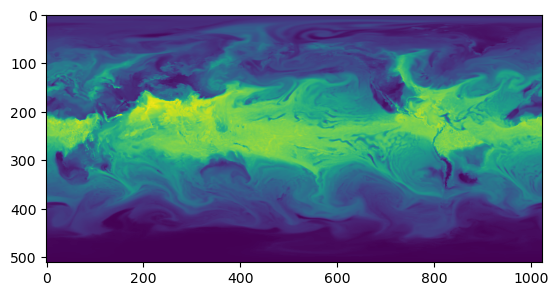

In [44]:
plt.imshow(var_list[0][100])
plt.show()

In [45]:
nbins = 100
_, edges = np.histogram(var_list[0], bins=nbins)
hists = []
for i in range(len(var_list)):
    h, _ = np.histogram(var_list[i], bins=edges)
    hists.append(h)

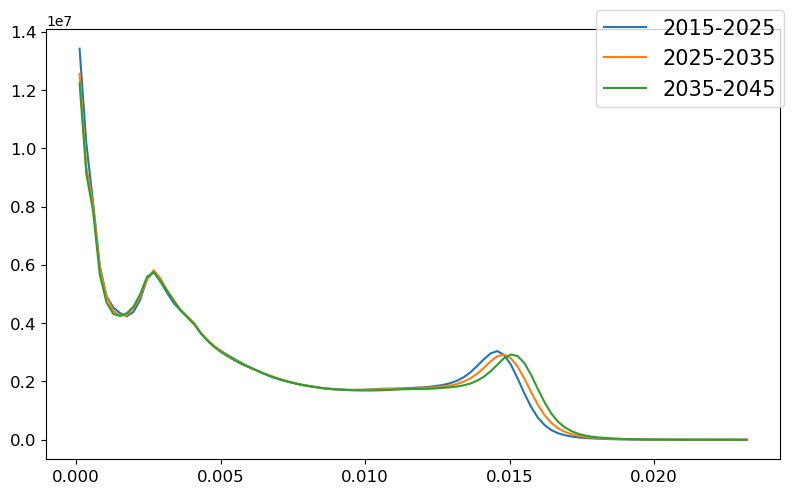

In [46]:
fig, ax = plt.subplots(1,1,figsize=(8,5), tight_layout=True) 
ctr = (edges[1:] + edges[:-1])/2
years = ["2015-2025", "2025-2035", "2035-2045"]
for y,h in zip(years,hists):
    ax.plot(ctr, h, '-')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
fig.legend(years, fontsize=15)

In [47]:
# temporal var
v1 = var_list[0]
v2 = var_list[2]

In [48]:
def temporal_variance(v):
    return np.std(v, axis=0)

In [49]:
v1_std = temporal_variance(v1)
v2_std = temporal_variance(v2)
print(v1_std.shape, v2_std.shape)

(511, 1024) (511, 1024)


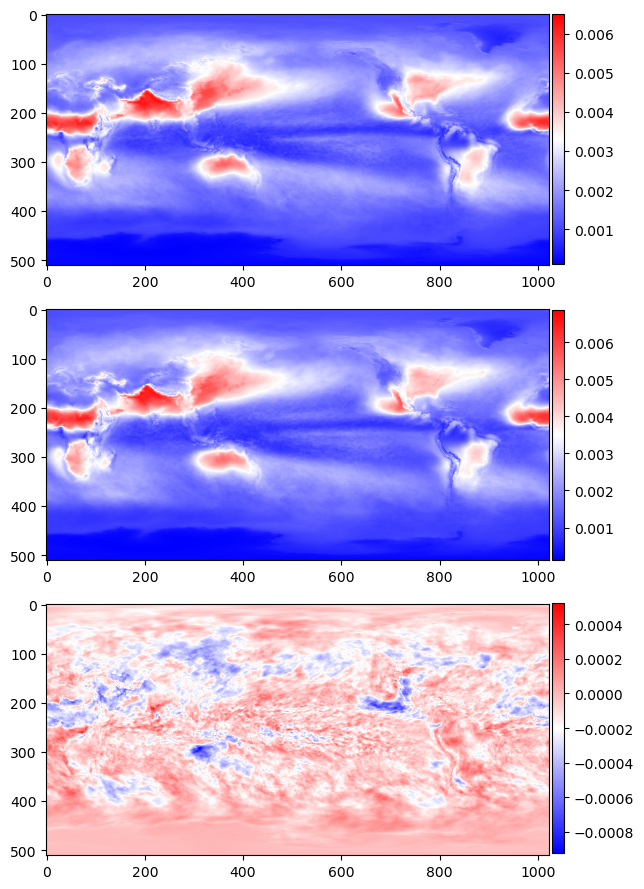

In [87]:
fig, ax = plt.subplots(3,1,figsize=(12,9), tight_layout=True) 
h1 = ax[0].imshow(v1_std, cmap="bwr")
h2 = ax[1].imshow(v2_std, cmap="bwr")
h3 = ax[2].imshow(v1_std - v2_std, cmap="bwr")
cbar_ax = fig.add_axes([0.712, 0.7, 0.01, 0.278])
fig.colorbar(h1, cax=cbar_ax)
cbar_ax = fig.add_axes([0.712, 0.371, 0.01, 0.278])
fig.colorbar(h2, cax=cbar_ax)
cbar_ax = fig.add_axes([0.712, 0.045, 0.01, 0.278])
fig.colorbar(h3, cax=cbar_ax)